In [5]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
df=pd.read_csv("twittertrain.csv")
df

,twitter_id,company,sentiment,tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [87]:
#to see all the data attributes
df.columns

Index(['twitter_id', 'company', 'sentiment', 'tweet'], dtype='object')

In [88]:
np.sum(df.isnull().any(axis=1))
df.isna().sum()

twitter_id      0
company         0
sentiment       0
tweet         686
dtype: int64

In [89]:
df = df.drop(['company'], axis=1)
df

,twitter_id,sentiment,tweet
0,2401,Positive,I am coming to the borders and I will kill you...
1,2401,Positive,im getting on borderlands and i will kill you ...
2,2401,Positive,im coming on borderlands and i will murder you...
3,2401,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Positive,im getting into borderlands and i can murder y...
...,...,...,...
74676,9200,Positive,Just realized that the Windows partition of my...
74677,9200,Positive,Just realized that my Mac window partition is ...
74678,9200,Positive,Just realized the windows partition of my Mac ...
74679,9200,Positive,Just realized between the windows partition of...


In [90]:
df=df.dropna(how='any')
df

,twitter_id,sentiment,tweet
0,2401,Positive,I am coming to the borders and I will kill you...
1,2401,Positive,im getting on borderlands and i will kill you ...
2,2401,Positive,im coming on borderlands and i will murder you...
3,2401,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Positive,im getting into borderlands and i can murder y...
...,...,...,...
74676,9200,Positive,Just realized that the Windows partition of my...
74677,9200,Positive,Just realized that my Mac window partition is ...
74678,9200,Positive,Just realized the windows partition of my Mac ...
74679,9200,Positive,Just realized between the windows partition of...


In [91]:
#after droping all the null rows we are checking it again
df.isna().sum()

twitter_id    0
sentiment     0
tweet         0
dtype: int64

In [92]:
#we only want 2 classes ie is positive and negative
df = df[df['sentiment'] != 'Irrelevant']
df = df[df['sentiment'] != 'Neutral']
df

,twitter_id,sentiment,tweet
0,2401,Positive,I am coming to the borders and I will kill you...
1,2401,Positive,im getting on borderlands and i will kill you ...
2,2401,Positive,im coming on borderlands and i will murder you...
3,2401,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Positive,im getting into borderlands and i can murder y...
...,...,...,...
74676,9200,Positive,Just realized that the Windows partition of my...
74677,9200,Positive,Just realized that my Mac window partition is ...
74678,9200,Positive,Just realized the windows partition of my Mac ...
74679,9200,Positive,Just realized between the windows partition of...


In [93]:
df['sentiment'].unique()

array(['Positive', 'Negative'], dtype=object)

In [94]:
df['sentiment'].nunique()

2

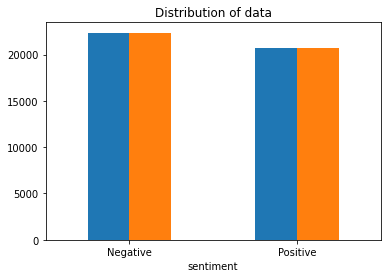

In [27]:
# Plotting the distribution for dataset.
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['tweet']), list(df['sentiment'])

<AxesSubplot: xlabel='sentiment', ylabel='count'>

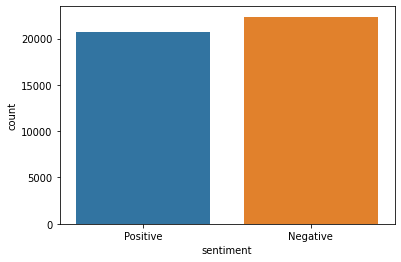

In [95]:
import seaborn as sns
sns.countplot(x='sentiment', data=df)

In [29]:
#Data Preprocessing
#In the above-given problem statement, before training the model, 
#we performed various pre-processing steps on the dataset that mainly dealt with removing stopwords, 
#removing special characters like emojis, hashtags, etc. The text document is then converted into lowercase 
#for better generalization.Subsequently, the punctuations were cleaned and removed, thereby reducing the unnecessary noise 
#from the dataset. After that, we also removed the repeating characters from the words along with removing the URLs as they
#do not have any significant importance.At last, we then performed Stemming(reducing the words to their derived stems)
#and Lemmatization(reducing the derived words to their root form, known as lemma) for better results.

In [96]:
data=df[['tweet','sentiment']]
data

,tweet,sentiment
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands 2 and i will murder ...,Positive
4,im getting into borderlands and i can murder y...,Positive
...,...,...
74676,Just realized that the Windows partition of my...,Positive
74677,Just realized that my Mac window partition is ...,Positive
74678,Just realized the windows partition of my Mac ...,Positive
74679,Just realized between the windows partition of...,Positive


In [97]:
data_pos = data[data['sentiment'] == 'Positive']
data_neg = data[data['sentiment'] == 'Negative']

In [98]:
data_pos

,tweet,sentiment
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands 2 and i will murder ...,Positive
4,im getting into borderlands and i can murder y...,Positive
...,...,...
74676,Just realized that the Windows partition of my...,Positive
74677,Just realized that my Mac window partition is ...,Positive
74678,Just realized the windows partition of my Mac ...,Positive
74679,Just realized between the windows partition of...,Positive


In [99]:
data_neg

,tweet,sentiment
23,the biggest dissappoinment in my life came out...,Negative
24,The biggest disappointment of my life came a y...,Negative
25,The biggest disappointment of my life came a y...,Negative
26,the biggest dissappoinment in my life coming o...,Negative
27,For the biggest male dissappoinment in my life...,Negative
...,...,...
74664,Nvidia really delayed the 3070 by 2 weeks.,Negative
74665,Nvidia did delay by 3070 2 weeks.,Negative
74666,Nvidia really delayed the 3070 several weeks.,Negative
74667,Nvidia really only delayed the 3070 2 flight w...,Negative


In [100]:
#taking equal number of rows from both the classifications for suitability of model
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [101]:
data_pos 

,tweet,sentiment
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands 2 and i will murder ...,Positive
4,im getting into borderlands and i can murder y...,Positive
...,...,...
72730,Fuck everything except Nvidia HD RTX 2080 000.,Positive
72737,@Activision after the new 30 Gb patch COD MW c...,Positive
72738,@ Activision after the new 30 GB patch COD MW ...,Positive
72739,@ Afvision after the new 30GB patch COD MW bre...,Positive


In [102]:
data_neg

,tweet,sentiment
23,the biggest dissappoinment in my life came out...,Negative
24,The biggest disappointment of my life came a y...,Negative
25,The biggest disappointment of my life came a y...,Negative
26,the biggest dissappoinment in my life coming o...,Negative
27,For the biggest male dissappoinment in my life...,Negative
...,...,...
66198,I can't wait.,Negative
66199,I can't wait.,Negative
66200,I can't explain.,Negative
66201,But I can't wait.,Negative


In [103]:
dataset = pd.concat([data_pos, data_neg])
dataset

,tweet,sentiment
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands 2 and i will murder ...,Positive
4,im getting into borderlands and i can murder y...,Positive
...,...,...
66198,I can't wait.,Negative
66199,I can't wait.,Negative
66200,I can't explain.,Negative
66201,But I can't wait.,Negative


In [104]:
#converting into lower case,evening the string all over
dataset['tweet']=dataset['tweet'].str.lower()
dataset['tweet'].head(20)

0     i am coming to the borders and i will kill you...
1     im getting on borderlands and i will kill you ...
2     im coming on borderlands and i will murder you...
3     im getting on borderlands 2 and i will murder ...
4     im getting into borderlands and i can murder y...
5     so i spent a few hours making something for fu...
6     so i spent a couple of hours doing something f...
7     so i spent a few hours doing something for fun...
8     so i spent a few hours making something for fu...
9     2010 so i spent a few hours making something f...
10                                                  was
17    that was the first borderlands session in a lo...
18    this was the first borderlands session in a lo...
19    that was the first borderlands session in a lo...
20    that was the first borderlands session in a lo...
21    that i was the first real borderlands session ...
22    that was the first borderlands session in a ho...
29    we finished borderlands 3 finally yas! tha

In [105]:
#defining stop words,so that we can trim the tweet for improving quality of data
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [106]:
#now actually cleaning using the predefined stopwordlist array
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['tweet'] = dataset['tweet'].apply(lambda text: cleaning_stopwords(text))
dataset['tweet'].head(10)

0                             coming borders kill all,
1                     im getting borderlands kill all,
2                    im coming borderlands murder all,
3                 im getting borderlands 2 murder all,
4                   im getting borderlands murder all,
5    spent hours making something fun. . . don't kn...
6    spent couple hours something fun... don't know...
7    spent hours something fun... don't know i'm hu...
8    spent hours making something fun. . . don't kn...
9    2010 spent hours making something fun. . . don...
Name: tweet, dtype: object

In [107]:
#cleaning and removing the punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['tweet']= dataset['tweet'].apply(lambda x: cleaning_punctuations(x))
dataset['tweet'].head(20)

0                               coming borders kill all
1                       im getting borderlands kill all
2                      im coming borderlands murder all
3                   im getting borderlands 2 murder all
4                     im getting borderlands murder all
5     spent hours making something fun   dont know h...
6     spent couple hours something fun dont know im ...
7     spent hours something fun dont know im huge  b...
8     spent hours making something fun   dont know h...
9     2010 spent hours making something fun   dont k...
10                                                     
17    first borderlands session long time actually r...
18    first borderlands session long time actually r...
19    first borderlands session long time actually r...
20    first borderlands session long time actually e...
21    first real borderlands session nice long wait ...
22    first borderlands session hot row actually rea...
29    finished borderlands 3 finally yas thank h

In [108]:
#cleaning and removing repatative characters/words from the string
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_repeating_char(x))
dataset['tweet'].head(15)

0                               coming borders kill all
1                       im getting borderlands kill all
2                      im coming borderlands murder all
3                   im getting borderlands 2 murder all
4                     im getting borderlands murder all
5     spent hours making something fun   dont know h...
6     spent couple hours something fun dont know im ...
7     spent hours something fun dont know im huge  b...
8     spent hours making something fun   dont know h...
9     210 spent hours making something fun   dont kn...
10                                                     
17    first borderlands session long time actually r...
18    first borderlands session long time actually r...
19    first borderlands session long time actually r...
20    first borderlands session long time actually e...
Name: tweet, dtype: object

In [109]:
#removing urls
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_URLs(x))
dataset['tweet'].head(15)

0                               coming borders kill all
1                       im getting borderlands kill all
2                      im coming borderlands murder all
3                   im getting borderlands 2 murder all
4                     im getting borderlands murder all
5     spent hours making something fun   dont know h...
6     spent couple hours something fun dont know im ...
7     spent hours something fun dont know im huge  b...
8     spent hours making something fun   dont know h...
9     210 spent hours making something fun   dont kn...
10                                                     
17    first borderlands session long time actually r...
18    first borderlands session long time actually r...
19    first borderlands session long time actually r...
20    first borderlands session long time actually e...
Name: tweet, dtype: object

In [110]:
#removing numerics
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_numbers(x))
dataset['tweet'].head(15)

0                               coming borders kill all
1                       im getting borderlands kill all
2                      im coming borderlands murder all
3                    im getting borderlands  murder all
4                     im getting borderlands murder all
5     spent hours making something fun   dont know h...
6     spent couple hours something fun dont know im ...
7     spent hours something fun dont know im huge  b...
8     spent hours making something fun   dont know h...
9      spent hours making something fun   dont know ...
10                                                     
17    first borderlands session long time actually r...
18    first borderlands session long time actually r...
19    first borderlands session long time actually r...
20    first borderlands session long time actually e...
Name: tweet, dtype: object

In [112]:
X=data.tweet
y=data.sentiment

In [114]:
X

0        I am coming to the borders and I will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    Just realized that the Windows partition of my...
74677    Just realized that my Mac window partition is ...
74678    Just realized the windows partition of my Mac ...
74679    Just realized between the windows partition of...
74680    Just like the windows partition of my Mac is l...
Name: tweet, Length: 43012, dtype: object

In [115]:
y

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
74676    Positive
74677    Positive
74678    Positive
74679    Positive
74680    Positive
Name: sentiment, Length: 43012, dtype: object

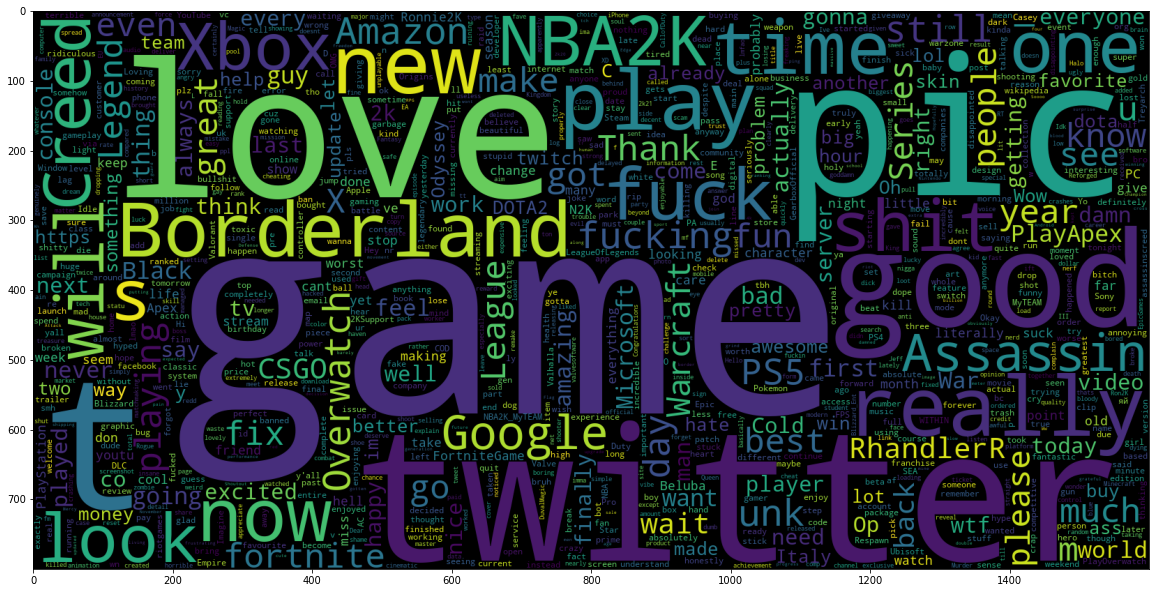

In [119]:
data_neg = data['tweet'][:80000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

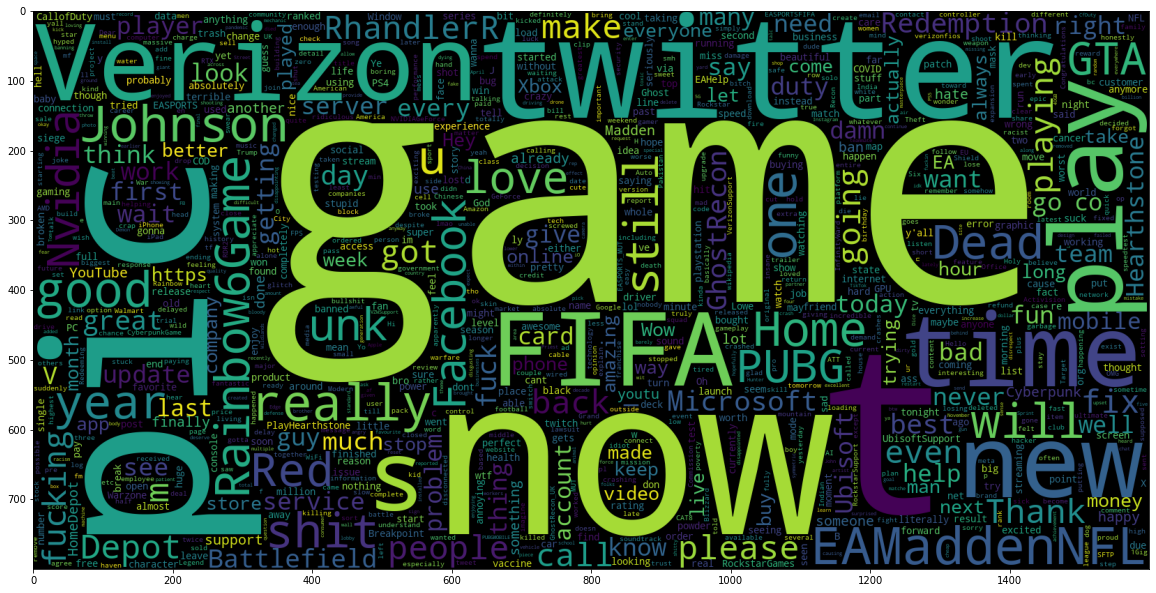

In [120]:
data_pos = data['tweet'][20000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [135]:
# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state =26105111)

In [136]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  178021


In [137]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [138]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

    Negative       0.94      0.95      0.95      4473
    Positive       0.95      0.94      0.94      4130

    accuracy                           0.95      8603
   macro avg       0.95      0.95      0.95      8603
weighted avg       0.95      0.95      0.95      8603



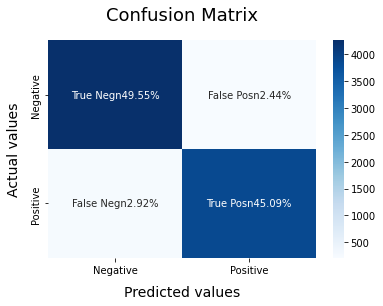

In [139]:
#logistic regression training
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)